# Building a University Score Prediction Model for 2023

**Zoe Guo, Owen Kwong, Dominic Leo, and Eleanor Yi (Group 27)**

## Introduction

Education is a factor important for both individual growth and the development of society. Year after year students around the globe compete to attend prestigious universities, some pursuing their interests while others strive to secure a well paying job after graduation. Consequently, university rankings and evaluation have appeared on the forefront of media as incoming students try to wade through the increasing amounts of information. While some quantitative properties such as campus size and number of students are easy to compare, others such as teaching quality and research advancement are less obvious. As a result, websites such as Maclean's Education and US News have created university rankings in an attempt to consolidate the information for students. However, this has often resulted in lots of debate which emphasizes how difficult it is to determine university rankings.
The goal of this project is to create a model that uses independent quantitative variables such as research score and student count to determine the overall score of the university. This model would be valuable as it could consider different score inputs and attempt to predict an overall score/ranking. The Times Higher Education (THE) has a dataset with "over 680,000 data points from more than 2,500 institutions'' (Ross, 2023). The director of data and analytics Duncan Ross oversees a team at THE that generates the world university rankings by accumulating data. Times Higher Education World University Rankings provides data on counts such as number of international students to standardized scores like teaching score. To explore this goal, we have formulated the research question:
Research Question: 

**How can we use multiple linear regression to predict the overall score of a university?**

Additionally, location may be a categorical factor that greatly affects overall score or its relationships with other variables since different cultures may adhere to unique styles of teaching. This raises another question that can be addressed:

**How do the top two locations for university rankings affect the association between OverAll Score and its "Score" predictors?** 

### Past Research:
There has been prior research related to our research question. For example, Udepi et al. uses the Quacquarelli Symonds approach to evaluate their dataset and build a machine learning algorithm for predicting university world rankings. Their approach was able to achieve a Root Mean Squared Error (RMSE) of 0.448 and a coefficient of determination (RSQ) of 0.841. This approach proved to be accurate and fairly reliable at determining the world rankings of universities, however, little analysis has been conducted into the usage of a Multi-Linear Regression (MLR) Model to predict global university rankings. Therefore, our report seeks to rectify this gap in literary knowledge.


(438)


## Methods - Exploratory Data Analysis

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(patchwork)
library(car)
library(tidymodels)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)
library(tibble)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

### Reading & Wrangling Data

In [2]:
WorldRank <- read_csv("https://raw.githubusercontent.com/owenkwong/STAT301-GROUP27/main/Ranking.csv") 
colnames(WorldRank) <- gsub(" ", ".", colnames(WorldRank))
colnames(WorldRank) <- gsub(":", ".", colnames(WorldRank))


head(WorldRank)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


University.Rank Name.of.University                    Location      
1 1               University of Oxford                  United Kingdom
2 2               Harvard University                    United States 
3 3               University of Cambridge               United Kingdom
4 3               Stanford University                   United States 
5 5               Massachusetts Institute of Technology United States 
6 6               California Institute of Technology    United States 
  No.of.student No.of.student.per.staff International.Student Female.Male.Ratio
1 20965         10.6                    42%                   48 : 52          
2 21887          9.6                    25%                   50 : 50          
3 20185         11.3                    39%                   47 : 53          
4 16164          7.1                    24%                   46 : 54          
5 11415          8.2                    33%                   40 : 60          
6  2237          6.2                    34%                   37 : 63          
  OverAll.Score Teaching.Score Research.Score Citations.Score
1 96.4          92.3           99.7           99.0           
2 95.2          94.8           99.0           99.3           
3 94.8          90.9           99.5           97.0           
4 94.8          94.2           96.7           99.8           
5 94.2          90.7           93.6           99.8           
6 94.1          90.9           97.0           97.3           
  Industry.Income.Score International.Outlook.Score
1 74.9                  96.2                       
2 49.5                  80.5                       
3 54.2                  95.8                       
4 65.0                  79.8                       
5 90.9                  89.3                       
6 89.8                  83.6

In [3]:
## convert variables to from chr to numeric
WorldRank <- WorldRank |>
             mutate(University.Rank = as.numeric(University.Rank),
                    No.of.student = as.numeric(gsub(",", "", No.of.student)),
                    OverAll.Score = as.numeric(OverAll.Score),
                    Teaching.Score = as.numeric(Teaching.Score),
                    Research.Score = as.numeric(Research.Score),
                    Citations.Score = as.numeric(Citations.Score),
                    Industry.Income.Score = as.numeric(Industry.Income.Score),
                    International.Outlook.Score = as.numeric(International.Outlook.Score))      

## covert the International.Student and Female.Male.Ratio to numeric value
WorldRank  <- WorldRank |>
              mutate(International.Student = as.numeric(sub("%","", International.Student)) * 100)
             
worldRank <- WorldRank |>
             mutate(Female.Male.Ratio = sapply(strsplit(as.character(WorldRank$Female.Male.Ratio), ":"), 
                                      function(x) as.numeric(x[1]) / as.numeric(x[2])))

worldRank$Location <- as.factor(worldRank$Location)
worldRank <- na.omit(worldRank)
head(worldRank)

Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `University.Rank = as.numeric(University.Rank)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”


University.Rank Name.of.University                    Location      
1 1               University of Oxford                  United Kingdom
2 2               Harvard University                    United States 
3 3               University of Cambridge               United Kingdom
4 3               Stanford University                   United States 
5 5               Massachusetts Institute of Technology United States 
6 6               California Institute of Technology    United States 
  No.of.student No.of.student.per.staff International.Student Female.Male.Ratio
1 20965         10.6                    4200                  0.9230769        
2 21887          9.6                    2500                  1.0000000        
3 20185         11.3                    3900                  0.8867925        
4 16164          7.1                    2400                  0.8518519        
5 11415          8.2                    3300                  0.6666667        
6  2237          6.2                    3400                  0.5873016        
  OverAll.Score Teaching.Score Research.Score Citations.Score
1 96.4          92.3           99.7           99.0           
2 95.2          94.8           99.0           99.3           
3 94.8          90.9           99.5           97.0           
4 94.8          94.2           96.7           99.8           
5 94.2          90.7           93.6           99.8           
6 94.1          90.9           97.0           97.3           
  Industry.Income.Score International.Outlook.Score
1 74.9                  96.2                       
2 49.5                  80.5                       
3 54.2                  95.8                       
4 65.0                  79.8                       
5 90.9                  89.3                       
6 89.8                  83.6

### Exploratory Data Visualisation

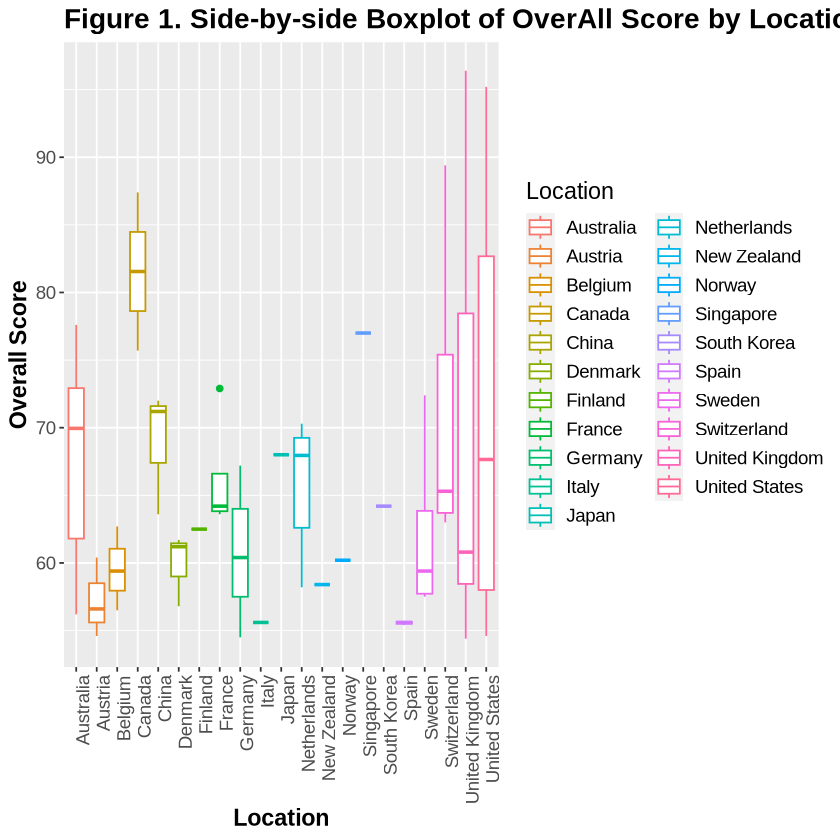

In [4]:
## Side-by-side Boxplot of OverAll Score by Location

worldRank_plot <- ggplot(worldRank, aes(x = Location, y = OverAll.Score, color = Location)) +
  geom_boxplot() +
  theme(
    text = element_text(size = 14),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 90, hjust = 1)  
  ) +
  
  ggtitle("Figure 1. Side-by-side Boxplot of OverAll Score by Location") +
  xlab("Location") +
  ylab("Overall Score")

worldRank_plot 

### Figure 1. Interpretation

**Observations**
1) The University of Canada Singapore  has the highest median overall score
2) The University of Italy and University of Spain has the lowest median overall score
3) The University of UK and  US has the largest whiskers which represent the range of the data

Upon visual inspection, there is no obvious association between OverAll Score and Location. However, this will be investigated more closely in our Discussion Section.

For now, we shall remove this categorical variable from our prediction model, as it will not only complicate our predictive model, but a more in-depth investigation into this input variable will be performed (as explored in the Discussion Section).

(105)

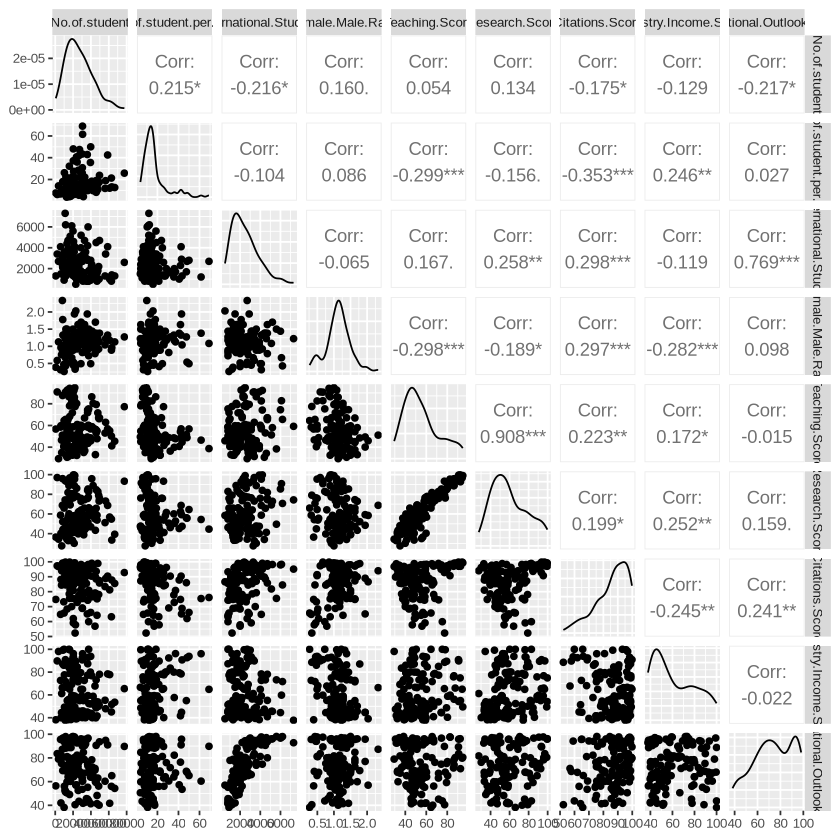

In [5]:
worldRank1 <- worldRank |> 
              select(-Location,-University.Rank,-Name.of.University)

worldRank_pairplot <- worldRank1 |>
                      select(-OverAll.Score) |>
                      ggpairs(progress = FALSE) +
                      theme(
                           text = element_text(size = 10),
                           plot.title = element_text(face = "bold"),
                           axis.title = element_text(face = "bold")
  )
worldRank_pairplot

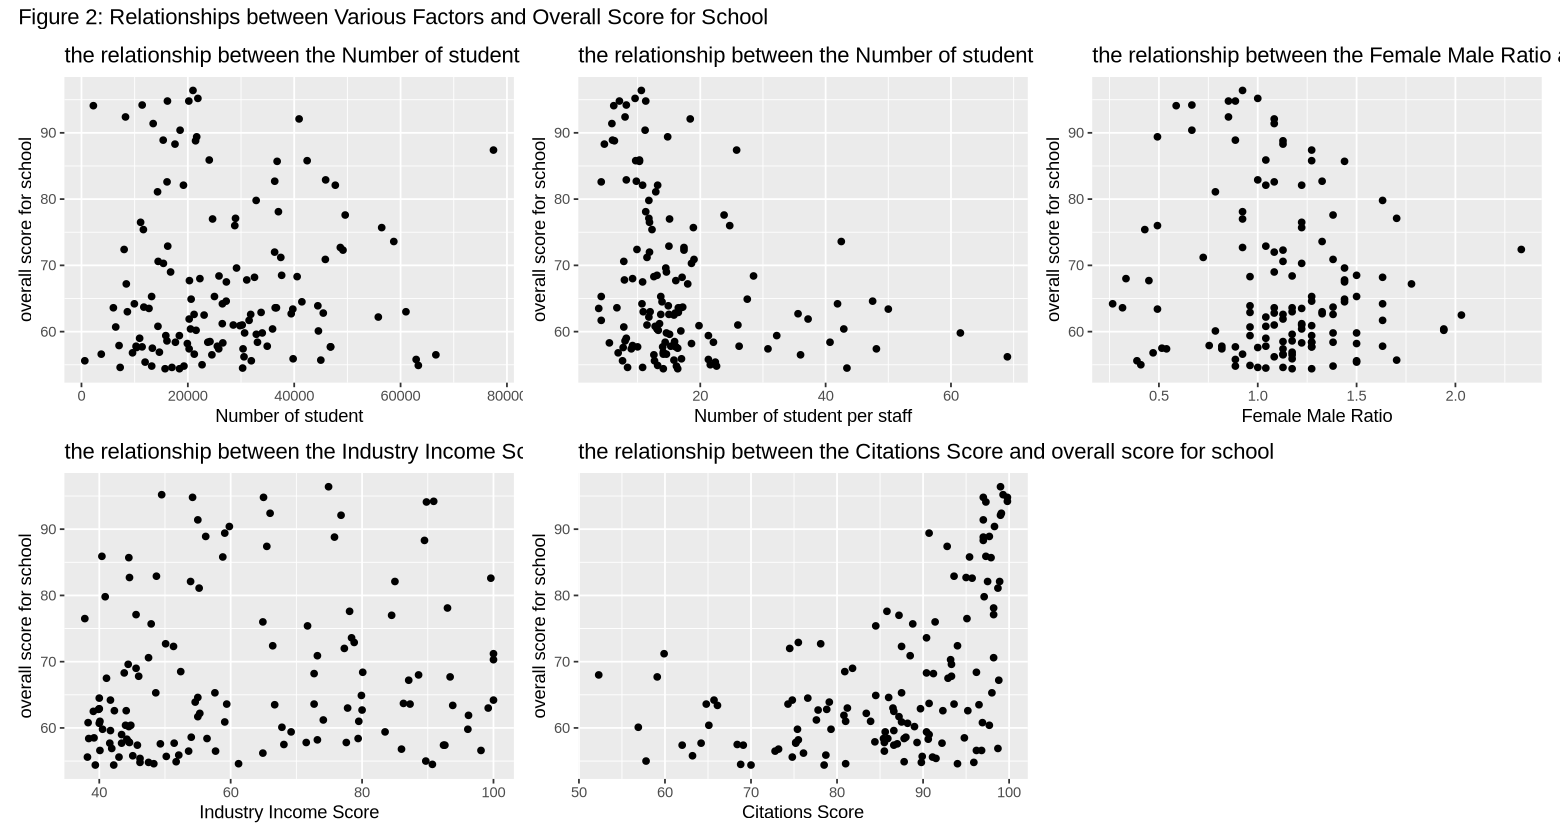

In [6]:
options(repr.plot.width = 13, repr.plot.height = 7)
plot1 <- ggplot(aes(x = No.of.student, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Number of student") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Number of student and overall score for school")


plot2 <- ggplot(aes(x = No.of.student.per.staff, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Number of student per staff") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Number of student per staff and overall score for school")


plot3 <- ggplot(aes(x = Female.Male.Ratio, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Female Male Ratio") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Female Male Ratio and overall score for school")


plot4 <- ggplot(aes(x = Industry.Income.Score, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Industry Income Score") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Industry Income Score and overall score for school")


plot5 <- ggplot(aes(x = Citations.Score, y = OverAll.Score), data = worldRank1) +
        geom_point() +
        xlab("Citations Score") +
        ylab("overall score for school") +
        ggtitle("the relationship between the Citations Score and overall score for school")



combined_plot <- plot1 + plot2 + plot3 + plot4 + plot5 +
                plot_layout(nrow = 2, byrow = TRUE) +
                plot_annotation(title = "Figure 2: Relationships between Various Factors and Overall Score for School")

combined_plot

### Figure 2. Interpretation

Upon visual inspection, there is no obvious association shown in the plots comparing number of students, students per staff, female male ratio, income score, and citations score to overall score 

(30)

## Methods - Plan

**Forward Selection**

Forward selection will be used to add one predictor variable at a time to improve the model's fit. We first set the seed for reproducibility and then split the dataset into training and testing sets where training set includes 75% of the data, while the testing set includes the remaining 25%. After the split, we remove the "Name.of.University" and "University Rank" columns from both the training and testing datasets. Then the predictor and response matrices for both the training and testing datasets are prepared. The predictor matrices (worldRank_X_train and worldRank_X_test) consist of all predictor variables except "OverAll.Score," while the response matrices (worldRank_Y_train and worldRank_Y_test) contain only the "OverAll.Score" variable. Next, we removed the two variables with highest VIF using the vif() function. Finally, we perform forward selection on the training dataset using the regsubsets() function. The maximum number of variables considered in the model (nvmax) is set to 9. This process identifies the best subset of predictor variables that provide the most significant improvement in the model's fit.

**MLR Model**

Firstly, training and testing datasets (training_subset and testing_subset) are defined to include only the selected predictor variables identified through forward selection, along with the response variable OverAll.Score. Then we define a multiple linear regression model using the tidymodels framework.
Afterwards, we create a recipe to define the formula for the linear regression model, where the response variable is "OverAll.Score," and the predictor variables are selected from the training subset. This way, a workflow can be used to integrate the recipe and model specification. The workflow consists of adding the recipe to preprocess the data and adding the model specification to define the modeling approach. Then, the workflow is fit to the training subset using the fit() function, which applies the specified data preprocessing steps and trains the linear regression model.
Finally, we predict the OverAll.Score for the testing subset using the fitted model. We bind the predicted values to the testing subset and calculate evaluation metrics, specifically the Root Mean Squared Error (RMSE), using the metrics() function. The resulting lm_test_resualts_selected dataframe contains the predicted values, true values, and evaluation metrics for the selected subset of variables.

(361)

### Feature Selection Process - Forward Selection

In [7]:
# initial split
set.seed(1234)

# Split the data
worldRank_split <- initial_split(worldRank1, prop = 0.75, strata = OverAll.Score)
training_worldRank <- training(worldRank_split)
testing_worldRank <- testing(worldRank_split)

# Remove university names and University Rank
training_worldRank <- training_worldRank[, !colnames(training_worldRank) %in% c("Name.of.University")]
testing_worldRank <- testing_worldRank[, !colnames(testing_worldRank) %in% c("Name.of.University")]

worldRank_X_train <- as.matrix(training_worldRank[, -5])
worldRank_Y_train <- as.matrix(training_worldRank[, 5]) 
worldRank_X_test <- as.matrix(testing_worldRank[, -5])
worldRank_Y_test <- as.matrix(testing_worldRank[, 5])

In [8]:
worldRank1 <- training_worldRank |>
    select(-OverAll.Score)

VIF_MLR_CASchools <- vif(worldRank1)

VIF_table <- data.frame(
  Variables = names(VIF_MLR_CASchools),
  VIF = VIF_MLR_CASchools
)
VIF_table

Variables                   VIF      
No.of.student               No.of.student                1.475915
No.of.student.per.staff     No.of.student.per.staff      1.439914
International.Student       International.Student        2.828084
Female.Male.Ratio           Female.Male.Ratio            1.721227
Teaching.Score              Teaching.Score              10.247845
Research.Score              Research.Score               9.671617
Citations.Score             Citations.Score              1.499364
Industry.Income.Score       Industry.Income.Score        1.492952
International.Outlook.Score International.Outlook.Score  3.127323

In [9]:
training_worldRank <- training_worldRank |>
    select(-Teaching.Score, -Research.Score)

worldRank_forward_sel <- regsubsets(
    x = OverAll.Score ~ . , nvmax = 9,
    data = training_worldRank,
    method = "forward" , )
worldRank_forward_summary <- summary(worldRank_forward_sel)
worldRank_forward_summary

Subset selection object
Call: regsubsets.formula(x = OverAll.Score ~ ., nvmax = 9, data = training_worldRank, 
    method = "forward", )
7 Variables  (and intercept)
                            Forced in Forced out
No.of.student                   FALSE      FALSE
No.of.student.per.staff         FALSE      FALSE
International.Student           FALSE      FALSE
Female.Male.Ratio               FALSE      FALSE
Citations.Score                 FALSE      FALSE
Industry.Income.Score           FALSE      FALSE
International.Outlook.Score     FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: forward
         No.of.student No.of.student.per.staff International.Student
1  ( 1 ) " "           " "                     " "                  
2  ( 1 ) " "           " "                     " "                  
3  ( 1 ) " "           " "                     " "                  
4  ( 1 ) "*"           " "                     " "                  
5  ( 1 ) "*"           " "           

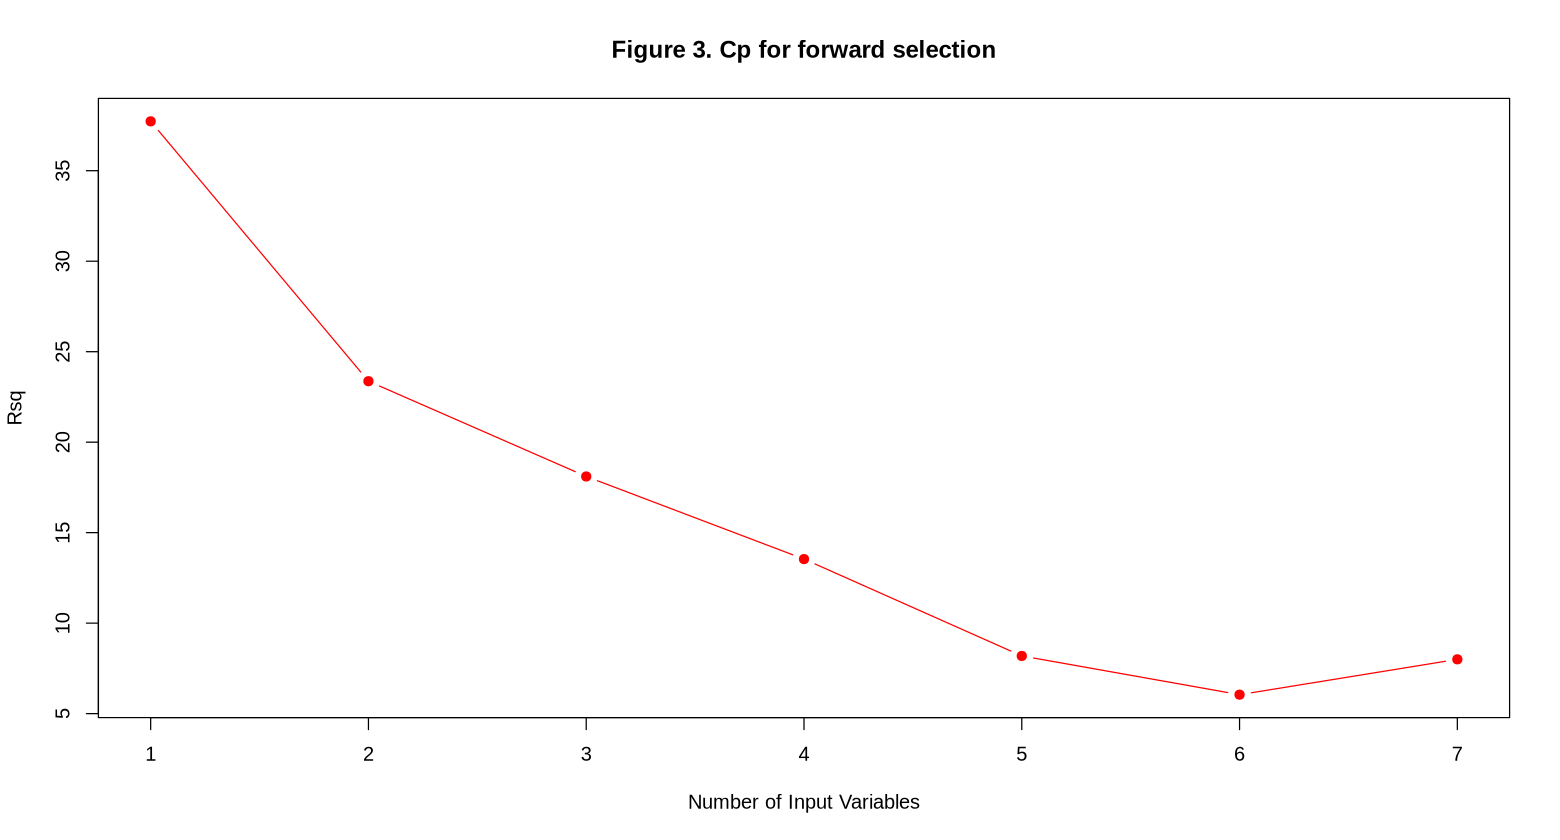

In [10]:
plot(summary(worldRank_forward_sel)$cp,
     main = "Figure 3. Cp for forward selection",
     xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 19,
     col = "red"
)

In [11]:
## selected variable 
cp_min = which.min(worldRank_forward_summary$cp)
selected_var <- names(coef(worldRank_forward_sel,cp_min))[-1]
as.matrix(selected_var)

[,1]                   
[1,] No.of.student          
[2,] No.of.student.per.staff
[3,] International.Student  
[4,] Female.Male.Ratio      
[5,] Citations.Score        
[6,] Industry.Income.Score

### Model Creation

In [12]:
## define the new training and test set 
training_subset <- training_worldRank %>% select(selected_var,OverAll.Score)
testing_subset <- testing_worldRank %>% select(selected_var,OverAll.Score)

## using the tidymodels
lm_spec <- linear_reg() %>% 
  set_engine("lm") %>% 
  set_mode("regression")

lm_recipe <- recipe(OverAll.Score ~ ., data = training_subset)

worldRank_full_tidy <- workflow() %>% 
  add_recipe(lm_recipe) %>% 
  add_model(lm_spec) %>% 
  fit(data = training_subset)

## Predict model and check the RMSE 
lm_test_resualts_selected <- worldRank_full_tidy |>
                    predict(testing_subset) |>
                    bind_cols(testing_subset) |>
                    metrics(truth = OverAll.Score, estimate = .pred)


lm_test_resualts_selected

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(selected_var)

  # Now:
  data %>% select(all_of(selected_var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


.metric .estimator .estimate
1 rmse    standard   7.4621182
2 rsq     standard   0.5630172
3 mae     standard   5.8482875

### Results 

Figure 3 demonstrates that the root mean square error (RMSE) reaches its minimum value when selecting six variables. Consequently, we have chosen to use six input variables for our analysis.

The model's adequacy was assessed using the Root Mean Square Error (RMSE) and the coefficient of determination (R²). As depicted in the table above, the MLR model incorporating these six predictors exhibits an R² of approximately 0.563, suggesting a moderate level of fit. While the model explains more than half of the variance, there is still a significant portion (43.7%) of the variance that it does not account for. Furthermore, the model achieved a Root Mean Square Error (RMSE) of 7.4621, indicating that, on average, the predictions of the model deviate from the observed values by 7.4621 units. It could suggest the model predictions are not very accurate.

(141)

## Discussion

Our goal in this project was to build a predictive model that would use some of the input variables recorded in our dataset to predict a university’s Overall Score. By first eliminating top-2 variables with the highest VIF, then using forward planning, and selecting the top-6 variables, we were able to build a predictive model with a RMSE of 7.46. Further, our RSQ was 0.56, suggesting a weak association between These results imply that our prediction 

One improvement we could make to our current model is to use a different dataset as our test data. A more recent dataset collated by Dee Dee contains the Times World University Rankings for 2024. Using this dataset could enable our model to work on data not as closely related to the current dataset, and would help to prevent issues such as overfitting. Therefore, by testing our prediction model on a different year’s dataset, we can further verify the accuracy of our prediction model.

This dataset can be found here: https://www.kaggle.com/datasets/ddosad/timesworlduniversityrankings2024/data 

Future research that follows from this study is how Location affects the association between input variables and OverAll Score. While our group did not include this in our model as it would unnecessarily complicate our MLR, investigation into how Location affects the relationship between our top input variable and OverAll Score should be conducted. As a preliminary investigation, we can build a MLR model with interaction using Citations Score (our top predictor), Overall Score (as our response variable) and Location, taking the top 3 locations with the most number of universities. 

(267) 

### Preliminary Investigation into how Location affects the Relationship Between Citations Score and Overall Score

In [13]:
location_data <- WorldRank |>
    filter(!is.na(Citations.Score)) |>
    filter(!is.na(OverAll.Score)) |>
    group_by(Location) |>
    summarise(mean = mean(OverAll.Score),
             sum = sum(No.of.student),
             num = n()) |>
    filter(!is.na(Location))

location_ordered_by_num <- location_data |>
    arrange(-num)

locations <- top_n(location_ordered_by_num, 3, num)$Location
locations

[1] "United States"  "Germany"        "United Kingdom"

In [14]:
red_data <- WorldRank |>
    filter(Location %in% locations) |>
    filter(!is.na(Citations.Score)) |>
    filter(!is.na(OverAll.Score))

red_MLR <- lm(OverAll.Score ~ Location * Citations.Score, data = red_data)
tidy(red_MLR, conf.int = TRUE, conf.level = 0.9)

term                                   estimate    std.error  statistic 
1 (Intercept)                             46.9875253 18.5848283  2.5282733
2 LocationUnited Kingdom                 -70.5013444 32.3472810 -2.1795138
3 LocationUnited States                  -54.3195257 22.5402784 -2.4098871
4 Citations.Score                          0.1646904  0.2363454  0.6968208
5 LocationUnited Kingdom:Citations.Score   0.8366610  0.3715004  2.2521129
6 LocationUnited States:Citations.Score    0.7073713  0.2752235  2.5701701
  p.value    conf.low     conf.high  
1 0.01322570   16.0966539  77.8783966
2 0.03193404 -124.2675499 -16.7351390
3 0.01801610  -91.7849695 -16.8540819
4 0.48773104   -0.2281524   0.5575331
5 0.02677519    0.2191695   1.4541524
6 0.01182690    0.2499070   1.1648355

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


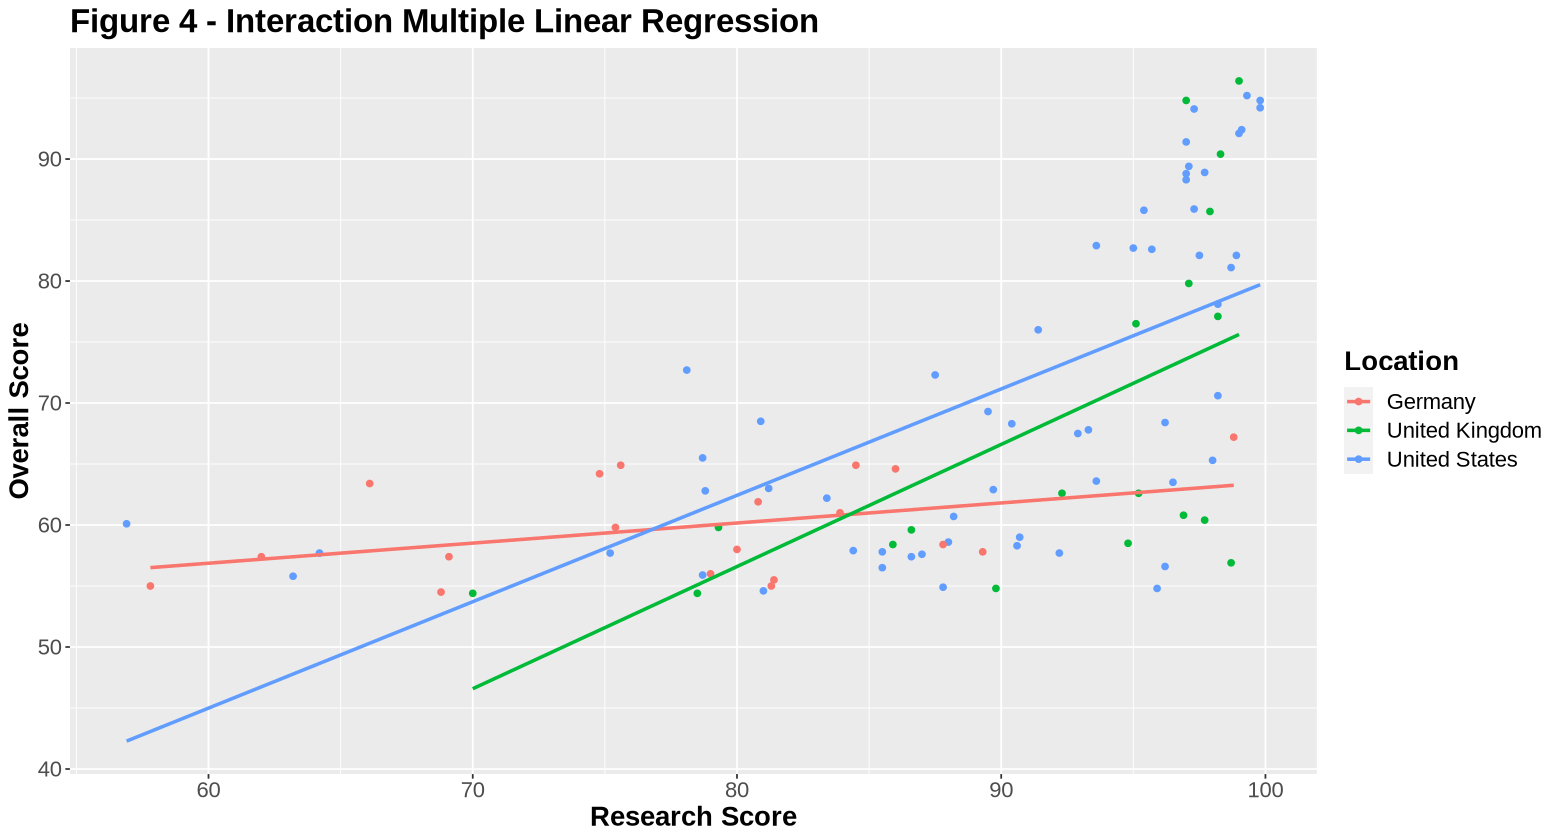

In [15]:
red_data$red_MLR_int <- predict(red_MLR)

red_MLR_int_plot <- ggplot(red_data, aes(
  x = Citations.Score,
  y = OverAll.Score,
  color = Location
)) +
  geom_point() +
  geom_line(aes(y = red_MLR_int), size = 1) +
  labs(
    title = "Figure 4 - Interaction Multiple Linear Regression",
    x = "Research Score",
    y = "Overall Score"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "Location")

red_MLR_int_plot

In Figure 4, we can see that although the coefficients of the United States and the United Kingdom are fairly similar, the linear coefficient of Germany is visibly different, providing evidence to the fact that Location does affect the relationship between our input variables and OverAll Score. Nevertheless, it is vital to conduct further statistical inference to statistically conclude one way or the other.

(64)

**Word Count: 1404**

## References

Ross, D. (2023, July 11). World University Rankings. Times Higher Education (THE). https://www.timeshighereducation.com/world-university-rankings/2023/world-ranking# 

Udupi, P. K. et al., (2023), Predicting global ranking of universities across the world using machine learning regression technique, SHS Web of Conferences, 156, 04001. https://doi.org/10.1051/shsconf/202315604001